# Performing Analysis of Meteorological Data

## Problem statement:


### The Null Hypothesis H0 is "Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming"


The H0 means we need to find whether the average Apparent temperature for the
month of a month say April starting from 2006 to 2016 and the average humidity for
the same period have increased or not. This monthly analysis has to be done for all 12
months over the 10 year period. So you are basically resampling your data from hourly
to monthly, then comparing the same month over the 10 year period. Support your
analysis by appropriate visualizations using matplotlib and / or seaborn library.


### Dataset Description

Formatted Date: An international standard covering the worldwide exchange and communication of date and time-related data

Summary: Hourly report of whether

Precip Type: In meteorology, the different types of precipitation often include the character, formation, or phase of the  precipitation which is falling to ground level.

Temperature (C): Temperature recorded in celcius 

Apparent Temperature (C): Apparent temperature, also known as feels like, is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed

Humidity: Humidity is the concentration of water vapor present in the air

Wind Speed (km/h): In meteorology, wind speed, or wind flow speed, is a fundamental atmospheric quantity caused by air moving from high to low pressure, usually due to changes in temperature. 

Wind Bearing (degrees) :Wind direction is generally reported by the direction from which it originates

Visibility (km): The visibility is the measure of the distance at which an object or light can be clearly discerned

Pressure: It is the force exerted on a surface by the air above it as gravity pulls it to Earth.

Daily Summary: Summary of whether



### Data cleaning

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# loading the dataset
df = pd.read_csv('weatherHistory.csv')

In [3]:
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
# checking the null values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
# statistical observations
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


#### Observation:
We can see above "Precip Type " have 517 null values.

"Formatted Date" is in object data type but it should be in date time format.

In statistical observations  "Humidity", "Wind Speed", "Wind Bearing", "Visibility", "Pressure" have minimun value 0.

In [7]:
# calculating percentage of null values present in dataframe for each column
missing_percentage = 100 * (df.isnull().sum())/len(df.index)
print(missing_percentage)

Formatted Date              0.000000
Summary                     0.000000
Precip Type                 0.536012
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Loud Cover                  0.000000
Pressure (millibars)        0.000000
Daily Summary               0.000000
dtype: float64


In [8]:
#creating copy of dataframe
df_n = df.copy()

In [9]:
#converting "Formatted Date" object data type to date time
df_n['Formatted Date'] = pd.to_datetime(df_n['Formatted Date'], utc=True)

In [10]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Loud Cover                96453 non-null  float64            
 10  Pressure (millibars)      96453 non-null  float64            
 11  Daily Summary  

In [11]:
#setting index of rows as formated date
df_n = df_n.set_index("Formatted Date")
df_n.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


#### The Null Hypothesis H0 is "Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming". So we need to resample our data from hourly to monthly, then comparing the same month over the 10 year period

# Resampling our Data from hourly to monthly
#### For resampling our data we need Apparent temperature and humidity for comparision 

In [12]:
# creating new DataFrame for resampling data hourly to monthly
column_to_keep = ['Apparent Temperature (C)' , 'Humidity']
df_monthly = df_n[column_to_keep].resample("MS").mean()


In [13]:
df_monthly.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


<AxesSubplot:title={'center':'Change of Humidity and Temperature over 10 years'}, xlabel='Formatted Date'>

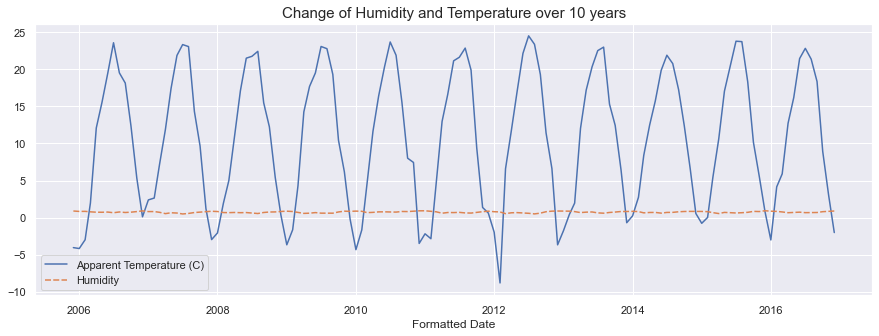

In [82]:
#lineplot Change of Humidity and Temperature over 10 years
plt.figure(figsize =(15,5))
plt.title('Change of Humidity and Temperature over 10 years',fontsize=15)
sns.lineplot(data = df_monthly, color = 'r')

<AxesSubplot:title={'center':'Change of Humidity over 10 years'}, xlabel='Formatted Date', ylabel='Humidity'>

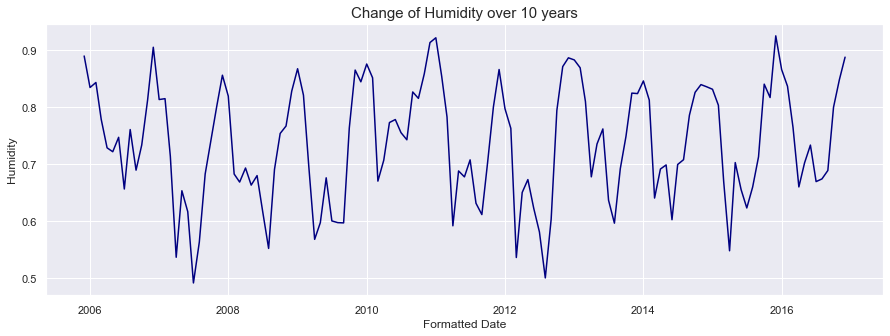

In [81]:
#lineplot Change of Humidity over 10 years
plt.figure(figsize =(15,5))
plt.title('Change of Humidity over 10 years',fontsize=15)
sns.lineplot(data = df_monthly['Humidity'], color = 'navy')

<Figure size 1008x1080 with 0 Axes>

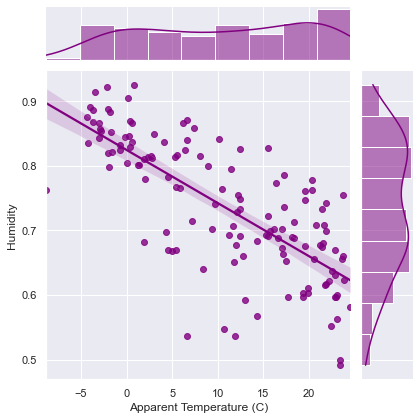

In [15]:
# Relation between Apparent Temperature and Humidity
plt.figure(figsize=(14,15))
x = df_monthly['Apparent Temperature (C)']
y = df_monthly['Humidity']
sns.set_theme(style="darkgrid")
sns.jointplot(x,y,kind = 'reg', color='purple')

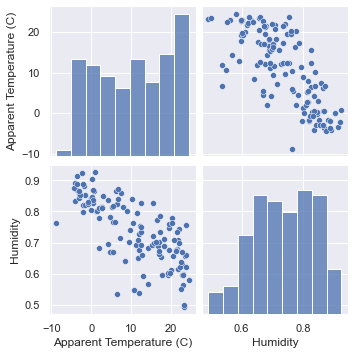

In [16]:
sns.pairplot(data = df_monthly)

In [17]:
# monthly dataFrame for 12 months across 10 years i.e from 2006 to 2016 
jan = df_monthly[df_monthly.index.month==1]
feb = df_monthly[df_monthly.index.month==2]
mar = df_monthly[df_monthly.index.month==3]
apr = df_monthly[df_monthly.index.month==4]
may = df_monthly[df_monthly.index.month==5]
jun = df_monthly[df_monthly.index.month==6]
jul = df_monthly[df_monthly.index.month==7]
aug = df_monthly[df_monthly.index.month==8]
sep = df_monthly[df_monthly.index.month==9]
octo = df_monthly[df_monthly.index.month==10]
nov = df_monthly[df_monthly.index.month==11]
dec = df_monthly[df_monthly.index.month==12]


In [18]:
jan

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2007-01-01 00:00:00+00:00,2.387015,0.813495
2008-01-01 00:00:00+00:00,-2.069907,0.819476
2009-01-01 00:00:00+00:00,-3.669937,0.867621
2010-01-01 00:00:00+00:00,-4.329062,0.875914
2011-01-01 00:00:00+00:00,-2.186813,0.922030
2012-01-01 00:00:00+00:00,-1.965211,0.797581
2013-01-01 00:00:00+00:00,-1.768578,0.883105
2014-01-01 00:00:00+00:00,0.234536,0.846169


## Apparent Temperature (C) Vs Humidity comparision for 12 months over 10 year's

In [83]:

def plot_Temp(month,a):
    plt.figure(figsize=(12,5))
    plt.plot(month.loc[f'2006-{a}-01':f'2016-{a}-01','Apparent Temperature (C)'],marker='o',label="Apparent Temperature",linestyle='-',color="firebrick")
    #plt.plot(month.loc[f'2006-{a}-01':f'2016-{a}-01','Humidity'],marker='o',linestyle='-',label="Humidity",color="navy")
    #plt.legend(['Apparent Temperature (C)','Humidity'],loc=4)
    plt.title(f"App Temp Vs Humidity variation in {a}/2006 TO {a}/2016",fontsize = 17)
    plt.show()
    

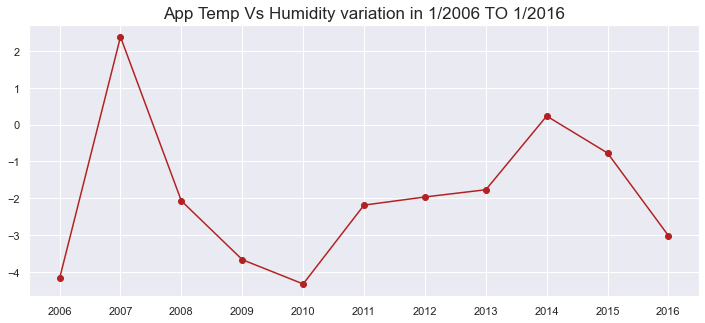

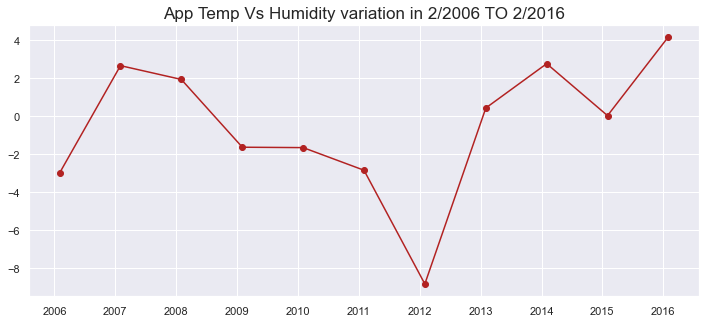

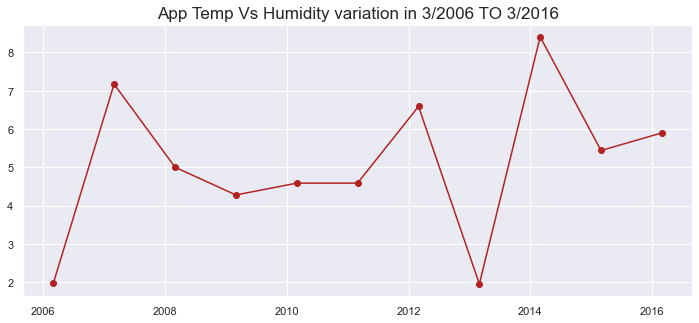

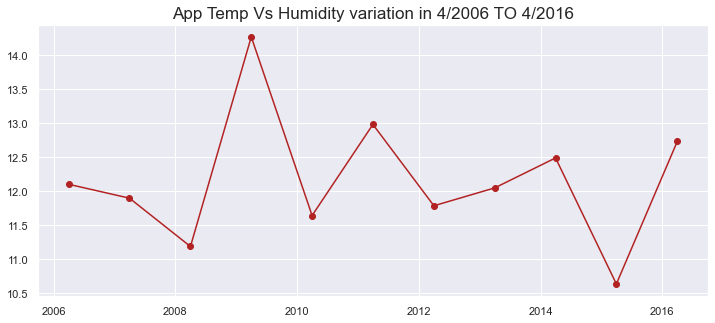

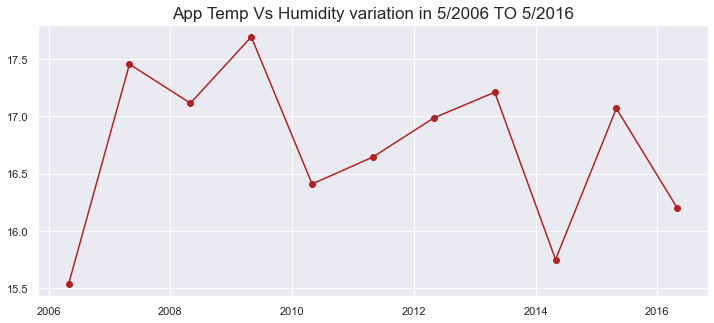

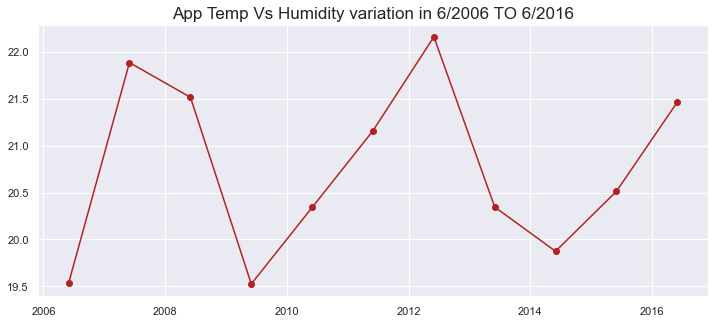

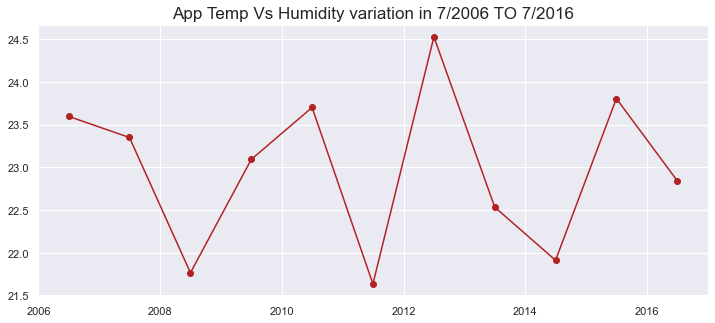

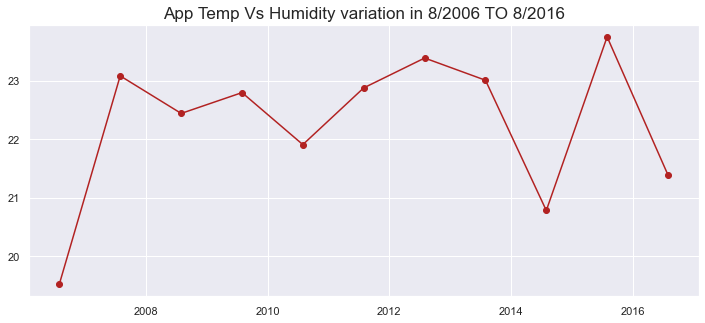

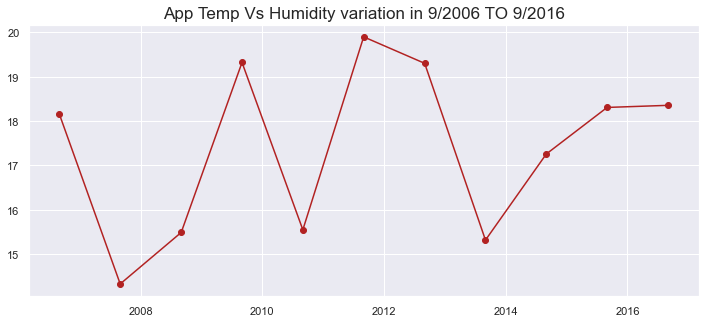

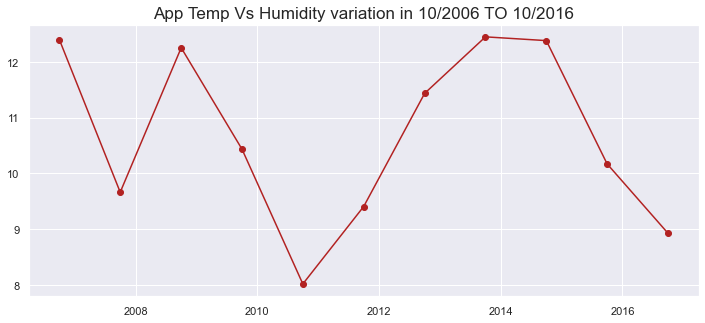

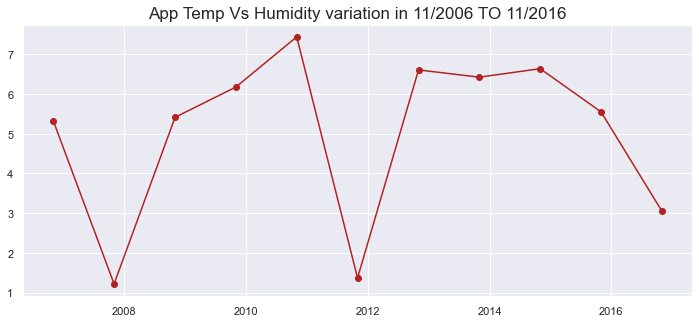

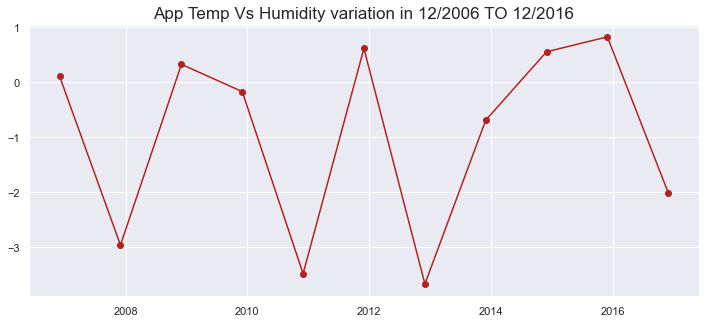

In [84]:
plot_Temp(jan,1)
plot_Temp(feb,2)
plot_Temp(mar,3)
plot_Temp(apr,4)
plot_Temp(may,5)
plot_Temp(jun,6)
plot_Temp(jul,7)
plot_Temp(aug,8)
plot_Temp(sep,9)
plot_Temp(octo,10)
plot_Temp(nov,11)
plot_Temp(dec,12)

### From above plots we can say there is a very minor change in Humidity over 10 years 
### From April to August there is very minimal change in Apparent  Temperature over 10 years
### From September to March Apparent Temperature is changing very dras